In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

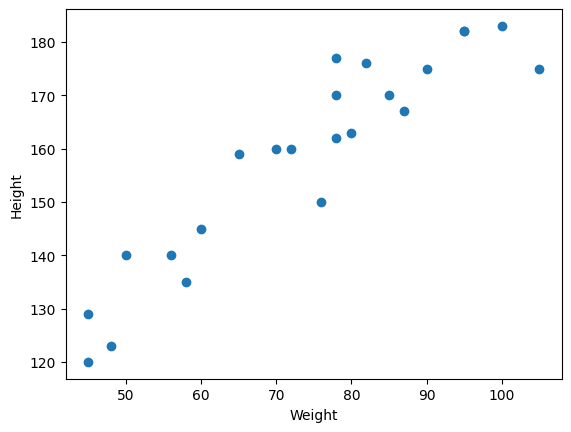

In [5]:
# Scatter Plot
plt.scatter(df["Weight"], df["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


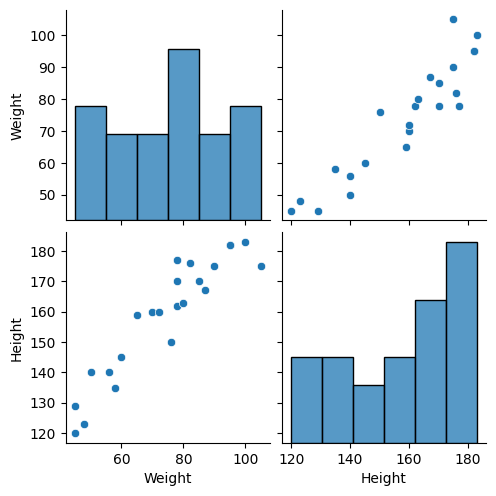

In [7]:
sns.pairplot(df)

In [8]:
# Independent and Dependent Features
X = df[['Weight']] # independent feature should be data frame or 2 dimensional array
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
np.array(X)

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

In [12]:
np.array(X).shape

(23, 1)

In [13]:
### Warining - Never Use that
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [14]:
Y = df['Height'] # This must be in one dimensions or in series
np.array(Y).shape

(23,)

In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(17, 1)

In [18]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [21]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression(n_jobs = -1)

In [23]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [24]:
print("Coefficient or Slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or Slope:  [1.04792503]
Intercept:  80.52684512622542


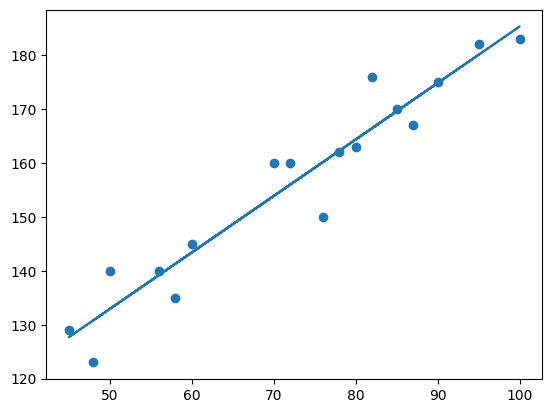

In [25]:
# Plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train, regression.predict(X_train))

In [26]:
# Predict for test data
Y_predict = regression.predict(X_test)

In [27]:
# Performance matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228686
9.665125886795005
10.7163749912126


### R Squared

In [29]:
from sklearn.metrics import r2_score

In [30]:
score = r2_score(Y_test, Y_predict)
print(score)

0.7360826717981279


### OLS Linear Regression

In [31]:
import statsmodels.api as sm

In [32]:
model = sm.OLS(Y_train, X_train).fit()

In [33]:
prediction = model.predict(X_test)

In [34]:
print(prediction)

15    164.134205
9     164.134205
0      94.692811
8     199.907045
17    136.778504
12    220.949891
dtype: float64


In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):                    2.80e-16
Time:                        10:33:01   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
regression.predict([[72]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([155.97744705])